# Criando a base fictícia

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Definindo o número de clientes
n_customers = 1000

In [4]:
# Gerando dados fictícios
np.random.seed(42) # Para reprodutibilidade

customer_id = np.arange(1, n_customers + 1)
age = np.random.randint(18, 80, size=n_customers)
tenure = np.random.randint(1, 72, size=n_customers)  # até 6 anos de permanência
monthly_charges = np.round(np.random.uniform(30, 100, size=n_customers), 2)
total_charges = np.round(monthly_charges * tenure, 2)
contract_type = np.random.choice(['Mensal', 'Anual'], size=n_customers, p=[0.7, 0.3])
internet_service = np.random.choice(['Fibra', 'DSL', 'Nenhuma'], size=n_customers, p=[0.6, 0.3, 0.1])
tech_support = np.random.choice(['Sim', 'Não'], size=n_customers, p=[0.3, 0.7])
churn = np.random.choice([0, 1], size=n_customers, p=[0.75, 0.25])  # 25% de churn

In [6]:
# Criando o DataFrame
df = pd.DataFrame({
    'customer_id': customer_id,
    'age': age,
    'tenure': tenure,
    'monthly_charges': monthly_charges,
    'total_charges': total_charges,
    'contract_type': contract_type,
    'internet_service': internet_service,
    'tech_support': tech_support,
    'churn': churn
})


In [8]:
# Salvando para CSV
df.to_csv('churn_ficticio.csv', index=False)

In [9]:
df.head()

,customer_id,age,tenure,monthly_charges,total_charges,contract_type,internet_service,tech_support,churn
0,1,56,11,61.25,673.75,Mensal,Fibra,Não,1
1,2,69,26,90.50,2353.00,Mensal,Fibra,Sim,0
2,3,46,63,69.07,4351.41,Mensal,Fibra,Sim,0
3,4,32,59,67.79,3999.61,Mensal,Fibra,Não,0
4,5,60,27,32.39,874.53,Anual,Nenhuma,Sim,0


# Análise Exploratória de Dados (EDA)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Verificando a distribuição das variáveis
df.describe()

,customer_id,age,tenure,monthly_charges,total_charges,churn
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.857000,35.19000,64.486790,2274.069720,0.236000
std,288.819436,18.114267,20.42506,20.155211,1544.909151,0.424835
min,1.000000,18.000000,1.00000,30.010000,31.220000,0.000000
25%,250.750000,35.000000,17.00000,46.412500,1021.095000,0.000000
50%,500.500000,50.000000,35.50000,64.770000,2053.470000,0.000000
75%,750.250000,66.000000,53.00000,82.215000,3345.070000,0.000000
max,1000.000000,79.000000,71.00000,99.800000,6737.160000,1.000000


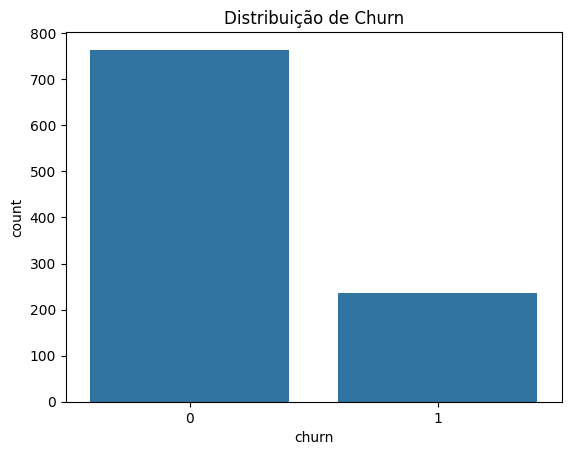

In [12]:
# Distribuição do churn
sns.countplot(x='churn', data=df)
plt.title('Distribuição de Churn')
plt.show()


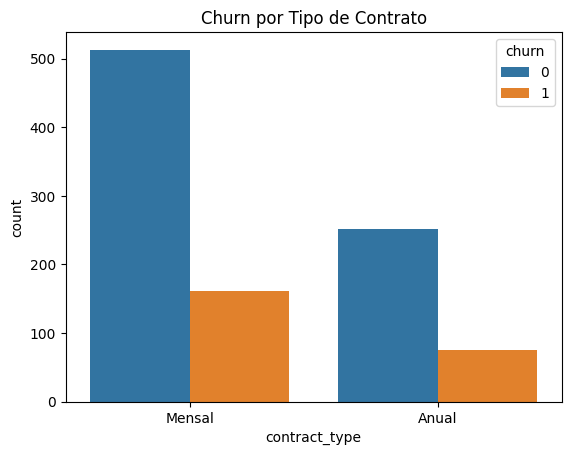

In [13]:
# Distribuição do tipo de contrato
sns.countplot(x='contract_type', hue='churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.show()


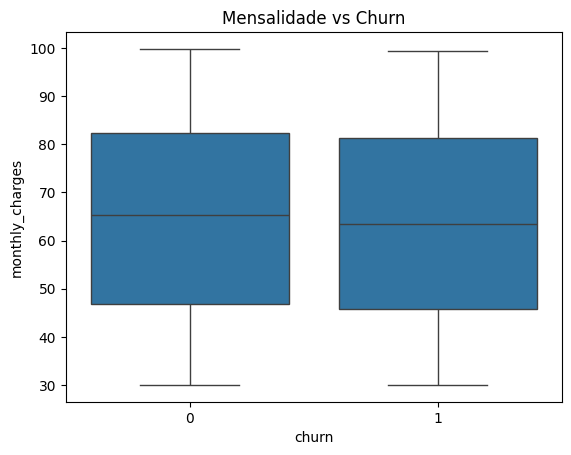

In [14]:
# Relação entre churn e mensalidade
sns.boxplot(x='churn', y='monthly_charges', data=df)
plt.title('Mensalidade vs Churn')
plt.show()


In [16]:
# Correlação entre as variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Matriz de Correlação')
plt.show()

ValueError: could not convert string to float: 'Mensal'

<Figure size 1000x600 with 0 Axes>

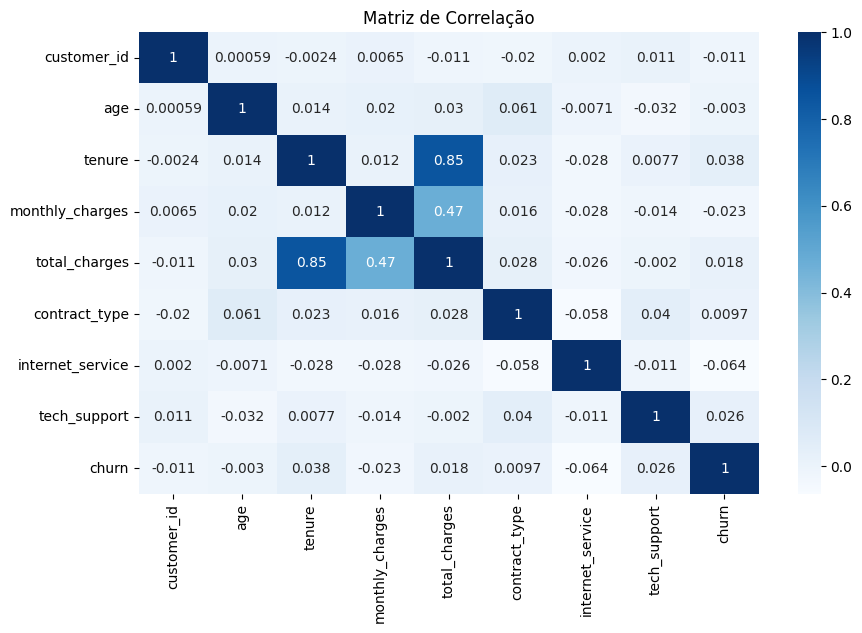

In [42]:
from sklearn.preprocessing import LabelEncoder

# Criando uma cópia do dataframe para trabalhar com as colunas numéricas
df_corr = df.copy()

# Aplicando o LabelEncoder para as colunas categóricas
le = LabelEncoder()
df_corr['contract_type'] = le.fit_transform(df_corr['contract_type'])
df_corr['internet_service'] = le.fit_transform(df_corr['internet_service'])
df_corr['tech_support'] = le.fit_transform(df_corr['tech_support'])

# Agora podemos gerar a matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='Blues')
plt.title('Matriz de Correlação')
plt.show()

# Pré-processamento dos Dados

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [25]:
# Codificando variáveis categóricas
le = LabelEncoder()
df['contract_type'] = le.fit_transform(df['contract_type'])
df['internet_service'] = le.fit_transform(df['internet_service'])
df['tech_support'] = le.fit_transform(df['tech_support'])


In [26]:
# Selecionando as features e o alvo
X = df.drop(columns=['customer_id', 'churn'])
y = df['churn']


In [27]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construção do Modelo Preditivo

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [29]:
# Criando e treinando o modelo de Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
# Fazendo previsões
y_pred = rf.predict(X_test)

In [31]:
# Avaliando o modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       220
           1       0.13      0.03      0.04        80

    accuracy                           0.70       300
   macro avg       0.43      0.48      0.43       300
weighted avg       0.57      0.70      0.61       300



In [32]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Matriz de Confusão:
[[207  13]
 [ 78   2]]


In [33]:
# AUC-ROC Score
y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {roc_auc:.2f}")

AUC-ROC: 0.44


# Ajuste de Hiperparâmetros e Validação

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# Definindo o grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [36]:
# Instanciando o RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                           n_iter=10, cv=3, random_state=42, n_jobs=-1)

In [37]:
# Treinando
rf_cv.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [38]:
# Melhor modelo
best_rf = rf_cv.best_estimator_


In [39]:
# Fazendo previsões com o melhor modelo
y_pred_best = best_rf.predict(X_test)


In [40]:
# Avaliando o modelo ajustado
print("Relatório de Classificação com Hiperparâmetros Otimizados:")
print(classification_report(y_test, y_pred_best))


Relatório de Classificação com Hiperparâmetros Otimizados:
              precision    recall  f1-score   support

           0       0.73      0.98      0.83       220
           1       0.00      0.00      0.00        80

    accuracy                           0.72       300
   macro avg       0.36      0.49      0.42       300
weighted avg       0.53      0.72      0.61       300



In [41]:
print("AUC-ROC com Hiperparâmetros Otimizados:")
y_prob_best = best_rf.predict_proba(X_test)[:, 1]
roc_auc_best = roc_auc_score(y_test, y_prob_best)
print(f"AUC-ROC: {roc_auc_best:.2f}")

AUC-ROC com Hiperparâmetros Otimizados:
AUC-ROC: 0.43
